In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
text = """What is the format of international cricket matches?
International cricket is played in three formats: Test matches, One-Day Internationals (ODIs), and Twenty20 Internationals (T20Is).

How long does a Test match last?
A Test match is scheduled over five days, with each day having three sessions of two hours each, separated by lunch and tea breaks.

What is the significance of the ICC World Cup?
The ICC World Cup is a global cricket tournament held every four years, featuring the world's top national teams competing in the One-Day International (ODI) format.

Can you explain the Duckworth-Lewis-Stern method?
The Duckworth-Lewis-Stern (DLS) method is a mathematical formula used to calculate the target score for the team batting second in a rain-affected limited-overs cricket match.

What are the roles of the umpires in a cricket match?
There are typically two on-field umpires in a cricket match, responsible for making decisions and ensuring the game is played according to the rules. A third umpire, who has access to video replays, assists with close decisions.

Who is considered the father of cricket?
William Gilbert Grace, known as W.G. Grace, is often considered the father of cricket due to his profound impact on the game during the late 19th century.

What is the Ashes series?
The Ashes is a Test cricket series played between England and Australia. It is one of the oldest and most celebrated rivalries in cricket.

What does a century mean in cricket?
A century refers to a batsman scoring 100 runs or more in a single innings.

How does the ICC ranking system work?
The International Cricket Council (ICC) ranks teams and players based on their performance in international matches. Points are awarded based on the match's outcome, the opposition's strength, and the match's format.

What is a hat-trick in cricket?
A hat-trick occurs when a bowler takes three wickets with consecutive deliveries in a single game.

Where can I find detailed statistics of cricket players and matches?
Detailed statistics can be found on the ICC official website and various sports news websites that specialize in cricket analytics.

What is the role of the International Cricket Council (ICC)?
The ICC is the global governing body for cricket, responsible for organizing international competitions, setting the rules, and promoting the game worldwide.

How are cricket bats made?
Cricket bats are traditionally made from willow wood, specifically English or Kashmir willow, and are handcrafted to meet different players' preferences and requirements.

What strategies do teams use in a T20 match?
In T20 matches, teams often adopt aggressive batting strategies to maximize their score in the limited overs, while bowlers use a mix of speed and spin to restrict runs and take wickets.

How can I improve my cricket knowledge and skills?
Improving cricket knowledge and skills can be achieved through watching matches, participating in cricket coaching sessions, and engaging with cricket communities online and offline.

What is a maiden over in cricket?
A maiden over is an over in which no runs are scored off the bat, indicating a bowler's dominance over the batsman during that period.

Who has scored the highest individual score in ODI cricket?
The highest individual score in an ODI is 264 runs, made by Rohit Sharma of India against Sri Lanka in 2014.

What is the ICC Champions Trophy?
The ICC Champions Trophy is an international cricket tournament second in importance only to the Cricket World Cup. It features the top eight teams in the ICC rankings.

Can you explain the concept of a no-ball in cricket?
A no-ball is an illegal delivery, primarily due to overstepping the crease, high full tosses, or throwing the ball. It results in one extra run for the batting team, and the next delivery is a free hit.

What does LBW stand for?
LBW stands for Leg Before Wicket, a method of dismissal where the ball would have hit the stumps but was intercepted by the batsman's leg or body part.

Who are the current top-ranked Test, ODI, and T20 teams?
(Note: This answer will change over time based on current rankings. You may need to update this information periodically.)

What is a powerplay in cricket?
A powerplay is a set of overs at the beginning of the innings where only two fielders are allowed outside the 30-yard circle, aiming to assist batsmen in scoring more runs.

Describe the role of a cricket captain.
A cricket captain is responsible for team strategy, field placements, and making crucial decisions like batting orders, bowling changes, and calls on the field.

What is the difference between red and white cricket balls?
Red balls are used in Test matches and have a traditional seam, offering more swing and seam movement. White balls are used in limited-overs cricket (ODIs and T20Is), known for being better under lights and offering less swing.

How is the Duckworth-Lewis-Stern method calculated?
The DLS method involves a complex formula that takes into account the number of overs and wickets remaining, adjusting the target score in rain-affected matches. (The exact formula is proprietary and complex.)

What is the history of cricket in the Olympics?
Cricket was played at the 1900 Paris Olympics, the only time it has been included in the Olympic Games, with Great Britain winning the gold medal.

What are the major domestic cricket leagues around the world?
Major domestic leagues include the Indian Premier League (IPL), Big Bash League (BBL) in Australia, Caribbean Premier League (CPL), and the Vitality Blast in England.

Who holds the record for the most runs in international cricket?
Sachin Tendulkar of India holds the record for the most runs in international cricket, across all formats.

What is the significance of the Spirit of Cricket?
The Spirit of Cricket refers to the sport's traditional values of respect, fairness, and sportsmanship, guiding how players should conduct themselves on the field.

Can you list some of the greatest cricket rivalries?
Some of the greatest cricket rivalries include India vs. Pakistan, Australia vs. England (The Ashes), and South Africa vs. Australia.

How are international cricket fixtures decided?
International cricket fixtures are decided by the Future Tours Programme (FTP), which is a schedule agreed upon by the member countries of the ICC.

What are the benefits of using DRS in cricket?
The Decision Review System (DRS) helps reduce umpiring errors by using technology like ball tracking and edge detection, allowing teams to challenge on-field decisions.

Who was the first player to score a double century in ODIs?
Sachin Tendulkar was the first player to score a double century in ODIs, achieving this milestone against South Africa in 2010.

What is the role of the match referee in cricket?
The match referee oversees the conduct of international cricket matches, ensuring that the game is played in accordance with the Laws of Cricket and the ICC Code of Conduct.

Explain the term 'googly' in cricket.
A googly is a type of delivery bowled by a leg-spin bowler that turns into the batsman, contrary to the normal leg spin direction, often deceiving the batsman.

How does the point system work in the ICC World Test Championship?
Points in the ICC World Test Championship are awarded for match wins, draws, and ties, with the total points available per series being equal, regardless of the series length.
"""

In [3]:
tokenizer = Tokenizer()

In [4]:
tokenizer.fit_on_texts([text])

In [5]:
tokenizer.word_index

{'the': 1,
 'cricket': 2,
 'in': 3,
 'a': 4,
 'and': 5,
 'is': 6,
 'of': 7,
 'what': 8,
 'to': 9,
 'are': 10,
 'icc': 11,
 'international': 12,
 'for': 13,
 'matches': 14,
 'match': 15,
 'on': 16,
 'test': 17,
 'how': 18,
 'with': 19,
 'by': 20,
 'teams': 21,
 'can': 22,
 'score': 23,
 'runs': 24,
 'over': 25,
 'world': 26,
 'who': 27,
 'played': 28,
 'does': 29,
 'method': 30,
 'overs': 31,
 'field': 32,
 'game': 33,
 'century': 34,
 'that': 35,
 'ball': 36,
 'one': 37,
 'odis': 38,
 'odi': 39,
 'you': 40,
 'batting': 41,
 'decisions': 42,
 'series': 43,
 'australia': 44,
 'it': 45,
 'batsman': 46,
 'or': 47,
 'an': 48,
 'leg': 49,
 'was': 50,
 'format': 51,
 'three': 52,
 'day': 53,
 'two': 54,
 'cup': 55,
 'top': 56,
 'explain': 57,
 'duckworth': 58,
 'lewis': 59,
 'stern': 60,
 'formula': 61,
 'used': 62,
 'team': 63,
 'limited': 64,
 'responsible': 65,
 'has': 66,
 'often': 67,
 'ashes': 68,
 'england': 69,
 'most': 70,
 'rivalries': 71,
 'more': 72,
 'system': 73,
 'players': 74,

In [6]:
len(tokenizer.word_index)

463

In [7]:
input_sequence = []

for sentence in text.split('\n\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1, len(tokenized_sentence)):
    input_sequence.append(tokenized_sentence[:i+1])

In [8]:
input_sequence

[[8, 6],
 [8, 6, 1],
 [8, 6, 1, 51],
 [8, 6, 1, 51, 7],
 [8, 6, 1, 51, 7, 12],
 [8, 6, 1, 51, 7, 12, 2],
 [8, 6, 1, 51, 7, 12, 2, 14],
 [8, 6, 1, 51, 7, 12, 2, 14, 12],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92, 17],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92, 17, 14],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92, 17, 14, 37],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92, 17, 14, 37, 53],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92, 17, 14, 37, 53, 93],
 [8, 6, 1, 51, 7, 12, 2, 14, 12, 2, 6, 28, 3, 52, 92, 17, 14, 37, 53, 93, 38],
 [8,
  6,
  1,
  51,
  7,
  12,
  2,
  14,
  12,
  2,
  6,
  28,
  3,
  52,
  92,
  17,
  14,
  37,
  53,
  93,
  38,
  5],
 [8,
  6,
  1,
  51

In [9]:
max_length =  max([len(x) for x in input_sequence])

In [10]:
max_length

49

In [11]:
padded_input_sequence = pad_sequences(input_sequence, maxlen = max_length, padding = 'pre')

In [12]:
padded_input_sequence

array([[  0,   0,   0, ...,   0,   8,   6],
       [  0,   0,   0, ...,   8,   6,   1],
       [  0,   0,   0, ...,   6,   1,  51],
       ...,
       [  0,   0,   0, ..., 462,   7,   1],
       [  0,   0,   0, ...,   7,   1,  43],
       [  0,   0,   0, ...,   1,  43, 463]], dtype=int32)

In [13]:
X = padded_input_sequence[:, :-1]
y = padded_input_sequence[:, -1]

In [14]:
X, y

(array([[  0,   0,   0, ...,   0,   0,   8],
        [  0,   0,   0, ...,   0,   8,   6],
        [  0,   0,   0, ...,   8,   6,   1],
        ...,
        [  0,   0,   0, ..., 461, 462,   7],
        [  0,   0,   0, ..., 462,   7,   1],
        [  0,   0,   0, ...,   7,   1,  43]], dtype=int32),
 array([  6,   1,  51, ...,   1,  43, 463], dtype=int32))

In [15]:
X.shape

(1195, 48)

In [16]:
y = to_categorical(y, num_classes = 464)

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
y.shape

(1195, 464)

In [19]:
model = Sequential()

model.add(Embedding(464, 100, input_length = 48))
model.add(LSTM(150))
model.add(Dense(464, activation = 'softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 48, 100)           46400     
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 464)               70064     
                                                                 
Total params: 267064 (1.02 MB)
Trainable params: 267064 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
38/38 [==============================] - 8s 127ms/step - loss: 5.8373 - accuracy: 0.0820
Epoch 2/100
38/38 [==============================] - 3s 73ms/step - loss: 5.4127 - accuracy: 0.0904
Epoch 3/100
38/38 [==============================] - 2s 48ms/step - loss: 5.3439 - accuracy: 0.0904
Epoch 4/100
38/38 [==============================] - 1s 40ms/step - loss: 5.2910 - accuracy: 0.0904
Epoch 5/100
38/38 [==============================] - 2s 67ms/step - loss: 5.2013 - accuracy: 0.0904
Epoch 6/100
38/38 [==============================] - 1s 36ms/step - loss: 5.0947 - accuracy: 0.0929
Epoch 7/100
38/38 [==============================] - 1s 28ms/step - loss: 4.9730 - accuracy: 0.1013
Epoch 8/100
38/38 [==============================] - 1s 24ms/step - loss: 4.8013 - accuracy: 0.1364
Epoch 9/100
38/38 [==============================] - 1s 28ms/step - loss: 4.6312 - accuracy: 0.1548
Epoch 10/100
38/38 [==============================] - 1s 19ms/step - loss: 4.4219 - accuracy: 0.184

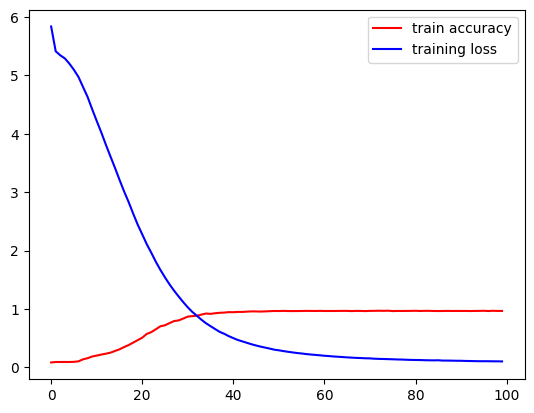

In [23]:
plt.plot(history.history['accuracy'], label = 'train accuracy', color = 'red')
plt.plot(history.history['loss'], label = 'training loss', color = 'blue')
plt.legend()
plt.show()

In [28]:
text = "Sachin Tendulkar of India holds the record"

for i in range(10):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen = 48, padding = 'pre')
  pos = np.argmax(model.predict([padded_token_text]))

  for word, index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 18ms/step
Sachin Tendulkar of India holds the record for
1/1 [==============================] - 0s 18ms/step
Sachin Tendulkar of India holds the record for the
1/1 [==============================] - 0s 18ms/step
Sachin Tendulkar of India holds the record for the most
1/1 [==============================] - 0s 18ms/step
Sachin Tendulkar of India holds the record for the most runs
1/1 [==============================] - 0s 26ms/step
Sachin Tendulkar of India holds the record for the most runs in
1/1 [==============================] - 0s 17ms/step
Sachin Tendulkar of India holds the record for the most runs in international
1/1 [==============================] - 0s 18ms/step
Sachin Tendulkar of India holds the record for the most runs in international cricket
1/1 [==============================] - 0s 21ms/step
Sachin Tendulkar of India holds the record for the most runs in international cricket sachin
1/1 [==============================] - 0s 23ms/s

In [54]:
text = "What is a powerplay?"

for i in range(10):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen = 48, padding = 'pre')
  pos = np.argmax(model.predict([padded_token_text]))

  for word, index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 18ms/step
What is a powerplay? in
1/1 [==============================] - 0s 19ms/step
What is a powerplay? in cricket
1/1 [==============================] - 0s 18ms/step
What is a powerplay? in cricket a
1/1 [==============================] - 0s 18ms/step
What is a powerplay? in cricket a powerplay
1/1 [==============================] - 0s 18ms/step
What is a powerplay? in cricket a powerplay is
1/1 [==============================] - 0s 18ms/step
What is a powerplay? in cricket a powerplay is a
1/1 [==============================] - 0s 18ms/step
What is a powerplay? in cricket a powerplay is a set
1/1 [==============================] - 0s 19ms/step
What is a powerplay? in cricket a powerplay is a set of
1/1 [==============================] - 0s 17ms/step
What is a powerplay? in cricket a powerplay is a set of overs
1/1 [==============================] - 0s 28ms/step
What is a powerplay? in cricket a powerplay is a set of overs at


In [53]:
text = "How are cricket bats made?"

for i in range(15):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen = 48, padding = 'pre')
  pos = np.argmax(model.predict([padded_token_text]))

  for word, index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 18ms/step
How are cricket bats made? cricket
1/1 [==============================] - 0s 29ms/step
How are cricket bats made? cricket bats
1/1 [==============================] - 0s 26ms/step
How are cricket bats made? cricket bats are
1/1 [==============================] - 0s 17ms/step
How are cricket bats made? cricket bats are traditionally
1/1 [==============================] - 0s 19ms/step
How are cricket bats made? cricket bats are traditionally made
1/1 [==============================] - 0s 18ms/step
How are cricket bats made? cricket bats are traditionally made from
1/1 [==============================] - 0s 18ms/step
How are cricket bats made? cricket bats are traditionally made from willow
1/1 [==============================] - 0s 19ms/step
How are cricket bats made? cricket bats are traditionally made from willow wood
1/1 [==============================] - 0s 27ms/step
How are cricket bats made? cricket bats are traditionally made from w

In [55]:
text = "What is Duckworth-Lewis-Stern?"

for i in range(15):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen = 48, padding = 'pre')
  pos = np.argmax(model.predict([padded_token_text]))

  for word, index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 18ms/step
What is Duckworth-Lewis-Stern? method
1/1 [==============================] - 0s 25ms/step
What is Duckworth-Lewis-Stern? method the
1/1 [==============================] - 0s 19ms/step
What is Duckworth-Lewis-Stern? method the duckworth
1/1 [==============================] - 0s 18ms/step
What is Duckworth-Lewis-Stern? method the duckworth lewis
1/1 [==============================] - 0s 18ms/step
What is Duckworth-Lewis-Stern? method the duckworth lewis stern
1/1 [==============================] - 0s 18ms/step
What is Duckworth-Lewis-Stern? method the duckworth lewis stern method
1/1 [==============================] - 0s 17ms/step
What is Duckworth-Lewis-Stern? method the duckworth lewis stern method calculated
1/1 [==============================] - 0s 17ms/step
What is Duckworth-Lewis-Stern? method the duckworth lewis stern method calculated the
1/1 [==============================] - 0s 18ms/step
What is Duckworth-Lewis-Stern? method t

In [60]:
text = "How long is a test match?"

for i in range(15):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen = 48, padding = 'pre')
  pos = np.argmax(model.predict([padded_token_text]))

  for word, index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 19ms/step
How long is a test match? last
1/1 [==============================] - 0s 18ms/step
How long is a test match? last a
1/1 [==============================] - 0s 21ms/step
How long is a test match? last a test
1/1 [==============================] - 0s 18ms/step
How long is a test match? last a test match
1/1 [==============================] - 0s 18ms/step
How long is a test match? last a test match is
1/1 [==============================] - 0s 17ms/step
How long is a test match? last a test match is scheduled
1/1 [==============================] - 0s 33ms/step
How long is a test match? last a test match is scheduled over
1/1 [==============================] - 0s 19ms/step
How long is a test match? last a test match is scheduled over five
1/1 [==============================] - 0s 17ms/step
How long is a test match? last a test match is scheduled over five days
1/1 [==============================] - 0s 18ms/step
How long is a test match? las